### Preprocess Amex train and test set

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# clear memory
# import gc
# del df
# gc.collect()

In [ ]:
!pip install fastparquet
import fastparquet

### Import and Edit the train set

In [5]:
df = pd.read_parquet('D:/_Databestanden/source/parquet/train.parquet')

In [6]:
df.shape

(5531451, 190)

In [1]:
df.head()

NameError: name 'df' is not defined

In [8]:
df.describe()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
count,1.130388e+07,1.136376e+07,1.136376e+07,1.136084e+07,1.136376e+07,9.622797e+06,1.136084e+07,1.136084e+07,1.357583e+06,7.951136e+06,...,1.136376e+07,1.136376e+07,1.136376e+07,1.136376e+07,1.136376e+07,1.126606e+07,1.966795e+06,1.136376e+07,1.133992e+07,1.136376e+07
mean,6.703143e-01,5.143341e+00,1.242712e-01,6.197365e-01,7.004065e-02,2.241823e-01,5.479341e-02,1.398404e-01,1.481060e-01,1.611384e-01,...,-9.379195e-01,-9.678666e-01,-9.584572e-01,1.645107e-01,2.056106e-02,1.612962e-01,4.068185e-01,1.643901e-01,4.912689e-02,6.323916e-01
std,2.455860e-01,9.035258e+00,2.044189e-01,3.974260e-01,2.098478e-01,1.956999e-01,1.962996e-01,2.422445e-01,2.509171e-01,2.100530e-01,...,3.719659e-01,1.778998e-01,2.466158e-01,3.932455e-01,1.559448e-01,3.333823e-01,2.483099e-01,3.931425e-01,1.780295e-01,2.166812e+00
min,-4.658552e-01,0.000000e+00,-7.057416e+00,2.125048e-10,0.000000e+00,-6.855620e-01,0.000000e+00,4.880305e-10,-5.467810e-04,8.992179e-09,...,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,-1.471698e-02,-1.000000e+00,1.051329e-09,-1.000000e+00
25%,4.863303e-01,0.000000e+00,9.505715e-03,9.869011e-02,0.000000e+00,1.265055e-01,0.000000e+00,5.502882e-03,2.361050e-02,4.430551e-02,...,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.005020e-01,0.000000e+00,2.753515e-03,0.000000e+00
50%,6.987661e-01,0.000000e+00,3.335463e-02,8.143016e-01,0.000000e+00,1.642667e-01,0.000000e+00,1.065161e-02,7.822216e-02,9.430225e-02,...,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.950928e-01,0.000000e+00,5.504539e-03,0.000000e+00
75%,8.649260e-01,8.000000e+00,1.344752e-01,1.002716e+00,0.000000e+00,2.621010e-01,0.000000e+00,1.806050e-01,1.809862e-01,1.967024e-01,...,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.944293e-01,0.000000e+00,8.254793e-03,0.000000e+00
max,1.010000e+00,3.170000e+02,1.324060e+00,1.010000e+00,3.258507e+00,4.341215e+00,1.211718e+01,1.698651e+00,4.191158e+00,1.249030e+01,...,7.000000e+00,1.000000e+00,6.000000e+00,1.000000e+00,1.000000e+00,1.320065e+00,2.280940e+00,1.000000e+00,1.343333e+00,6.000000e+01


In [6]:
# df.columns = df.columns.str.lower()

In [ ]:
# df[comma] = round(df[comma],2)

In [8]:
df['customer_ID'].nunique()

458913

In [217]:
df.dtypes

customer_ID     object
S_2             object
P_2            float32
D_39             int16
B_1            float32
                ...   
D_142          float32
D_143             int8
D_144          float32
D_145             int8
target           int64
Length: 191, dtype: object

### Map labels to training data and add to df

In [9]:
train_label = pd.read_csv('D:/_Databestanden/source/train_labels.csv')

In [10]:
train_label.head()

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0


In [11]:
train_label.shape

(458913, 2)

In [12]:
train_label.nunique

<bound method DataFrame.nunique of                                               customer_ID  target
0       0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...       0
1       00000fd6641609c6ece5454664794f0340ad84dddce9a2...       0
2       00001b22f846c82c51f6e3958ccd81970162bae8b007e8...       0
3       000041bdba6ecadd89a52d11886e8eaaec9325906c9723...       0
4       00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...       0
...                                                   ...     ...
458908  ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...       0
458909  ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...       0
458910  ffff9984b999fccb2b6127635ed0736dda94e544e67e02...       0
458911  ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...       1
458912  fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...       0

[458913 rows x 2 columns]>

In [13]:
my_dict = train_label.set_index('customer_ID').to_dict()['target']

In [16]:
df['target'] = df['customer_ID'].map(my_dict)

In [144]:
df.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0,0.008724,1.006838,0.009228,0.124035,0.0,0.004709,...,-1,-1,0,0,0.0,NaN,0,0.000610,0,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0,0.004923,1.000653,0.006151,0.126750,0.0,0.002714,...,-1,-1,0,0,0.0,NaN,0,0.005492,0,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,3,0.021655,1.009672,0.006815,0.123977,0.0,0.009423,...,-1,-1,0,0,0.0,NaN,0,0.006986,0,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0,0.013683,1.002700,0.001373,0.117169,0.0,0.005531,...,-1,-1,0,0,0.0,NaN,0,0.006527,0,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0,0.015193,1.000727,0.007605,0.117325,0.0,0.009312,...,-1,-1,0,0,0.0,NaN,0,0.008126,0,0


### Basic exploration

In [195]:
df['D_137'].value_counts(normalize=True)

-1    0.964801
 0    0.034873
 1    0.000325
Name: D_137, dtype: float64

In [23]:
duplicates = df[df.duplicated(subset=['customer_ID'], keep=False)]

In [24]:
duplicates.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0,0.008724,1.006838,0.009228,0.124035,0.0,0.004709,...,-1,-1,0,0,0.0,NaN,0,0.000610,0,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0,0.004923,1.000653,0.006151,0.126750,0.0,0.002714,...,-1,-1,0,0,0.0,NaN,0,0.005492,0,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,3,0.021655,1.009672,0.006815,0.123977,0.0,0.009423,...,-1,-1,0,0,0.0,NaN,0,0.006986,0,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0,0.013683,1.002700,0.001373,0.117169,0.0,0.005531,...,-1,-1,0,0,0.0,NaN,0,0.006527,0,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0,0.015193,1.000727,0.007605,0.117325,0.0,0.009312,...,-1,-1,0,0,0.0,NaN,0,0.008126,0,0


In [197]:
duplicates.shape

(5526331, 191)

In [29]:
target1 = duplicates[duplicates['target'] == 1]

### Some checks and comparisons

In [216]:
for i in range (1,29):
    print(df['R_'+str(i)].value_counts(normalize=True).head(5))
    print(train_13_mut['R_'+str(i)].value_counts(normalize=True).head(5))

0.504868    0.000002
0.503550    0.000002
0.507670    0.000002
0.507046    0.000002
0.500492    0.000002
Name: R_1, dtype: float64
0.500041    0.00012
1.009838    0.00008
0.503218    0.00008
0.503997    0.00008
0.503721    0.00008
Name: R_1, dtype: float64
0    0.957484
1    0.042516
Name: R_2, dtype: float64
0    0.84804
1    0.15196
Name: R_2, dtype: float64
0    0.531860
1    0.214487
2    0.108251
3    0.056315
4    0.032143
Name: R_3, dtype: float64
0    0.38132
1    0.21284
2    0.13964
3    0.08912
4    0.05156
Name: R_3, dtype: float64
0    0.973795
1    0.026205
Name: R_4, dtype: float64
0    0.90124
1    0.09876
Name: R_4, dtype: float64
0    0.971559
1    0.017221
2    0.005125
3    0.002263
4    0.001250
Name: R_5, dtype: float64
0    0.89432
1    0.05744
2    0.02036
3    0.01012
4    0.00580
Name: R_5, dtype: float64
0.009221    0.000001
0.008141    0.000001
0.008697    0.000001
0.007898    0.000001
0.009385    0.000001
Name: R_6, dtype: float64
0.004108    0.00008
0.0051

In [120]:
mylist = target1['customer_ID'].value_counts()[target1['customer_ID'].value_counts()==13].index

In [124]:
df_list = pd.DataFrame(mylist, columns =['customer_ID'])

In [128]:
df_list = df_list.set_index('customer_ID')

In [130]:
df_list.head()

""
customer_ID
0000f99513770170a1aba690daeeb8a96da4a39f11fc27da5c30a79db61c1e85
9e8e65f8728290d19a12ab8af036c16a36e39a8e170ced5d090b1515d3c7a0cf
9e8d6bf514f686da91150c7b795275c87c7262a875980e58bacfff9ab591855e
9e8d53733e029fa1e7508f06cf813c27eab8e7a9686d83cab4f430cbf62d21d9
9e8b152911f51990597af9554205b67c393bb133aba62038e4f3c5008ed3b9b4


In [131]:
mylist = df_list.index.tolist()

In [132]:
new_target = target1[target1['customer_ID'].isin(mylist) ==True]

In [196]:
new_target['D_137'].value_counts(normalize=True)

-1    0.917006
 0    0.082233
 1    0.000762
Name: D_137, dtype: float64

In [135]:
# Subset 25000 rows
train_13_mut = new_target.iloc[0:25000,]

In [136]:
train_13_mut.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
104,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,2017-03-15,0.400025,0,0.954861,0.023890,0.003140,NaN,0.0,1.175081,...,-1,-1,1,0,0.870115,0.141214,1,0.008945,8,1
105,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,2017-04-14,0.405788,0,0.944042,0.025613,0.008950,NaN,0.0,1.177973,...,-1,-1,1,0,0.864712,0.145885,1,0.002125,8,1
106,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,2017-05-15,0.403615,1,0.940261,0.026016,0.009074,NaN,0.0,1.175785,...,-1,-1,1,0,0.871729,0.144555,1,0.000765,8,1
107,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,2017-06-14,0.391495,1,0.936253,0.029538,0.005778,NaN,0.0,1.174703,...,-1,-1,1,0,0.869414,0.151890,1,0.008195,8,1
108,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,2017-07-15,0.392356,1,0.915764,0.028671,0.008595,NaN,0.0,1.177958,...,-1,-1,1,0,0.869089,0.152654,1,0.001493,8,1


In [141]:
# sort columns
train_13_mut = train_13_mut[['customer_ID','B_1','B_2','B_3','B_4','B_5','B_6','B_7','B_8','B_9','B_10','B_11','B_12','B_13','B_14','B_15','B_16','B_17','B_18','B_19','B_20','B_21','B_22','B_23','B_24','B_25','B_26','B_27','B_28','B_29','B_30','B_31','B_32','B_33','B_36','B_37','B_38','B_39','B_40','B_41','B_42','D_102','D_103','D_104','D_105','D_106','D_107','D_108','D_109','D_110','D_111','D_112','D_113','D_114','D_115','D_116','D_117','D_118','D_119','D_120','D_121','D_122','D_123','D_124','D_125','D_126','D_127','D_128','D_129','D_130','D_131','D_132','D_133','D_134','D_135','D_136','D_137','D_138','D_139','D_140','D_141','D_142','D_143','D_144','D_145','D_39','D_41','D_42','D_43','D_44','D_45','D_46','D_47','D_48','D_49','D_50','D_51','D_52','D_53','D_54','D_55','D_56','D_58','D_59','D_60','D_61','D_62','D_63','D_64','D_65','D_66','D_68','D_69','D_70','D_71','D_72','D_73','D_74','D_75','D_76','D_77','D_78','D_79','D_80','D_81','D_82','D_83','D_84','D_86','D_87','D_88','D_89','D_91','D_92','D_93','D_94','D_96','P_2','P_3','P_4','R_1','R_2','R_3','R_4','R_5','R_6','R_7','R_8','R_9','R_10','R_11','R_12','R_13','R_14','R_15','R_16','R_17','R_18','R_19','R_20','R_21','R_22','R_23','R_24','R_25','R_26','R_27','R_28','S_2','S_3','S_5','S_6','S_7','S_8','S_9','S_11','S_12','S_13','S_15','S_16','S_17','S_18','S_19','S_20','S_22','S_23','S_24','S_25','S_26','S_27','target']]

In [142]:
train_13_mut.sort_values(by=['customer_ID', 'S_2'])

,customer_ID,B_1,B_10,B_11,B_12,B_13,B_14,B_15,B_16,B_17,...,S_18,S_19,S_20,S_22,S_23,S_24,S_25,S_26,S_27,target
104,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,0.954861,0.020635,0.969766,0.018335,0.009596,0.333512,0.003978,12,0.988959,...,0,0.004563,0,0.304424,10.204194,0.079394,NaN,0.006128,NaN,1
105,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,0.944042,0.018678,0.951195,0.017145,0.007395,0.328997,0.003912,12,0.945094,...,0,0.001547,0,0.304320,10.207058,0.078617,NaN,0.006269,NaN,1
106,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,0.940261,0.020730,0.954219,0.021047,0.002851,0.327183,0.002127,12,0.966243,...,0,0.009672,0,0.300034,8.508413,0.080034,NaN,0.000227,NaN,1
107,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,0.936253,0.011259,0.946501,0.013595,0.002453,0.320698,0.008467,12,0.925747,...,0,0.003435,0,0.294911,5.966975,0.084904,NaN,0.009701,NaN,1
108,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,0.915764,0.014064,0.935196,0.014791,0.004830,0.326490,0.000355,12,0.967664,...,0,0.004714,0,0.299822,0.135733,0.086973,0.973914,0.007918,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118070,057ef056eccbde4f54e4a30e945e4e449c609f323233cb...,0.948900,0.008126,1.044055,0.035035,0.024661,0.741297,0.007766,12,0.961749,...,0,0.001689,0,0.955982,0.235931,0.974243,0.341333,0.003793,0.376168,1
118071,057ef056eccbde4f54e4a30e945e4e449c609f323233cb...,0.951401,0.007811,1.054171,0.040097,0.016424,0.746142,0.005601,12,0.966146,...,0,0.004159,0,0.949331,0.233145,0.963766,0.305095,0.005694,0.008382,1
118072,057ef056eccbde4f54e4a30e945e4e449c609f323233cb...,0.938270,0.007705,1.040145,0.038943,0.013327,0.733647,0.000052,12,0.969948,...,0,0.002739,0,0.958945,0.235602,0.963006,0.293156,0.005099,0.003598,1
118073,057ef056eccbde4f54e4a30e945e4e449c609f323233cb...,0.955389,0.006678,1.057437,0.040536,0.016334,0.744162,0.004959,12,0.890065,...,0,0.008914,0,0.961078,0.240133,0.964729,0.290862,0.002879,0.007108,1


In [143]:
file = "D:/_Databestanden/traindata/train_13_mut.csv"
train_13_mut.to_csv(file, index=False)

### Set correct dtypes

In [15]:
# df.dtypes

unnamed: 0       int64
customer_id     object
s_2             object
p_2            float64
d_39           float64
                ...   
d_142          float64
d_143          float64
d_144          float64
d_145          float64
target           int64
Length: 192, dtype: object

In [16]:
# cols = ['b_30', 'b_38', 'd_114', 'd_116', 'd_117', 'd_120', 'd_126', 'd_63', 'd_64', 'd_66', 'd_68']

In [17]:
# df[cols] = df[cols].astype('category')

In [18]:
df.to_csv('F:/_Databestanden/amex_sample.csv')

### EDA histogram plot

In [ ]:
for col in df.columns:
    df[col].plot(kind='bar')
    plt.title(col)
    plt.show()

### Import a 33GB file
https://medium.com/aatomz-research/how-did-i-convert-the-33-gb-dataset-into-a-3-gb-file-using-pandas-b21d8da205c0

In [1]:
import pandas as pd
import gc
import glob
import os

In [ ]:
chunk_size=500000
num=1
for chunk in pd.read_csv('F:/_Databestanden/test_data.csv',chunksize=chunk_size):
    chunk.to_csv('chunk'+str(num)+'.csv',index=False)
    gc.collect()
    num+=1

In [ ]:
df = pd.read_csv('chunk2.csv')
df.head()

In [ ]:
df.info()

In [ ]:
path = r'F:\_Databestanden\chunks_amex'
all_files = glob.glob(os.path.join(path, "*.csv"))
grouped_files = []

for filename in all_files:
    chunk = pd.read_csv(filename, index_col=None, header=0)
    print(chunk.memory_usage().sum()/1024**3)
    for col in chunk.columns:
        if chunk[col].dtype == 'float64':
            chunk[col] = chunk[col].astype('float16')
        if chunk[col].dtype == 'int64':
            chunk[col] = chunk[col].astype('int8')
    gc.collect()
    grouped_files.append(chunk)

    df = pd.concat(grouped_files, axis=0, ignore_index=True)
    print(df.memory_usage().sum()/1024**3)

In [ ]:
df.to_feather("optimised_amex.feather")

In [ ]:
df = pd.read_feather('optimised_amex.feather')
df.head()

In [ ]:
df1.dtypes.value_counts()

### Separate step: check 4 samples and try to balance them

In [5]:
train1 = pd.read_csv('D:/_Databestanden/samples/df_sample_500.csv')
train2 = pd.read_csv('D:/_Databestanden/samples/df_sample_501.csv')
train3 = pd.read_csv('D:/_Databestanden/samples/df_sample_502.csv')
train4 = pd.read_csv('D:/_Databestanden/samples/df_sample_503.csv')

In [6]:
train4.head()

,Unnamed: 0,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,1851,0017039b6f3eceb538de3d312f77028bf274cf61f992a3...,2017-04-30,0.790588,0.000587,0.179299,0.087905,0.009421,1.496560,0.000029,...,NaN,NaN,0.007027,0.004346,0.007805,NaN,0.004064,0.009832,0.002686,0
1,11808,008d362e5f04f2830a77b683d4f8e5f1bc95d584826ebd...,2017-11-18,0.905534,0.004934,0.017092,1.001321,0.001382,0.174529,0.007555,...,NaN,NaN,0.007343,0.008283,0.006358,NaN,0.003868,0.000511,0.005138,0
2,11964,008ebb1d6a19e19cfb1289fcf5f76745b82e204c125775...,2018-01-07,0.784520,0.387071,0.064299,1.009128,0.004430,0.070870,0.000098,...,NaN,NaN,0.002206,0.002395,0.001321,NaN,0.007708,0.008844,0.006575,0
3,3540,002b930ad6a7e6551482b48a4dbf0f43003e80877f7224...,2017-12-17,0.517841,0.000040,0.022175,1.000154,0.001345,0.171985,0.009663,...,NaN,NaN,0.000727,0.001603,0.009232,NaN,0.009030,0.002474,0.003869,0
4,20473,00f63162232baf77c67e25c829b97decfa15ca3cff3a05...,2017-11-25,0.782171,0.002913,0.000985,0.818735,0.004165,NaN,0.008046,...,NaN,NaN,1.005608,0.004036,0.971639,0.624976,1.000561,0.746332,0.274960,0


<AxesSubplot:>

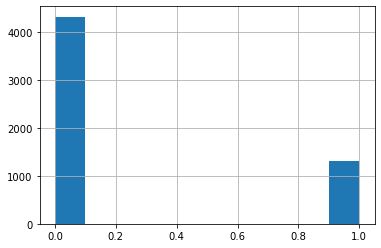

In [7]:
train1['target'].hist()

In [8]:
train1['target'].value_counts()

0    4321
1    1314
Name: target, dtype: int64

In [9]:
train1['target'].value_counts()[0]

4321

In [10]:
train1['target'].value_counts()[1] / train1['target'].value_counts()[0]

0.3040962740106457

In [11]:
train2['target'].value_counts()[1] / train2['target'].value_counts()[0]

0.31689647113811636

In [12]:
train3['target'].value_counts()[1] / train3['target'].value_counts()[0]

0.3305785123966942

In [13]:
train4['target'].value_counts()[1] / train4['target'].value_counts()[0]

0.3290094339622642

### Group the train data

In [250]:
train = df

In [251]:
features = train.drop(['customer_ID', 'S_2','target'], axis = 1).columns.to_list()
cat_features = [
        "B_30",
        "B_38",
        "D_114",
        "D_116",
        "D_117",
        "D_120",
        "D_126",
        "D_63",
        "D_64",
        "D_66",
        "D_68",
    ]
num_features = [col for col in features if col not in cat_features]
train_num_grouped = train.groupby("customer_ID")[num_features].agg(['mean', 'std', 'last'])

In [252]:
train_cat = train.drop(num_features, axis=1)
train.columns

Index(['customer_ID', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41',
       'B_3',
       ...
       'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143', 'D_144',
       'D_145', 'target'],
      dtype='object', length=191)

In [253]:
train_cat = train_cat.drop('S_2',axis=1)

In [249]:
train_cat.head(20)

,B_30,B_38,D_114,D_116,D_117,D_120,D_126,D_63,D_64,D_66,D_68
customer_ID,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0,2,1,0,5,0,2,0,0,-1,6
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0,2,1,0,0,0,2,3,0,-1,6
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,0,1,1,0,0,0,2,3,2,-1,6
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,0,2,1,0,7,0,2,3,0,-1,3
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,0,1,1,0,5,0,2,3,0,1,6
000084e5023181993c2e1b665ac88dbb1ce9ef621ec5370150fc2f8bdca6202c,0,2,1,0,2,0,2,3,2,-1,6
000098081fde4fd64bc4d503a5d6f86a0aedc425c96f5235f98b0f47c9d7d8d4,0,3,0,0,3,0,1,3,2,-1,3
0000d17a1447b25a01e42e1ac56b091bb7cbb06317be4cb59b50fec59e0b6381,0,3,1,0,7,0,2,3,2,-1,5
0000f99513770170a1aba690daeeb8a96da4a39f11fc27da5c30a79db61c1e85,1,7,0,0,0,0,2,3,3,1,6


In [254]:
train_cat = train_cat.groupby('customer_ID')[cat_features].agg('last')

In [258]:
train_grouped = train_num_grouped.join(train_cat, on='customer_ID')

C:\Users\nico_\AppData\Local\Temp\ipykernel_44104\2056217143.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  train_grouped = train_num_grouped.join(train_cat, on='customer_ID')


In [266]:
train_grouped = train_grouped.reset_index()

In [260]:
my_dict = train_label.set_index('customer_ID').to_dict()['target']

In [267]:
train_grouped['target'] = train_grouped['customer_ID'].map(my_dict)

In [268]:
train_grouped.head()

,customer_ID,"(P_2, mean)","(P_2, std)","(P_2, last)","(D_39, mean)","(D_39, std)","(D_39, last)","(B_1, mean)","(B_1, std)","(B_1, last)",...,D_114,D_116,D_117,D_120,D_126,D_63,D_64,D_66,D_68,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.933824,0.024194,0.934745,0.230769,0.832050,0,0.012007,0.006547,0.009382,...,1,0,5,0,2,0,0,-1,6,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0.899820,0.022119,0.880519,7.153846,6.743468,6,0.025654,0.027756,0.034684,...,1,0,0,0,2,3,0,-1,6,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.878454,0.028911,0.880875,0.000000,0.000000,0,0.004386,0.002786,0.004284,...,1,0,0,0,2,3,2,-1,6,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0.598969,0.020107,0.621776,1.538462,3.017046,0,0.059876,0.080531,0.012564,...,1,0,7,0,2,3,0,-1,3,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0.891679,0.042325,0.871900,0.000000,0.000000,0,0.005941,0.002475,0.007679,...,1,0,5,0,2,3,0,1,6,0


In [3]:
file = "D:/_Databestanden/traindata/train_grouped.csv"
train_grouped = pd.read_csv(file)

### Convert column names to new values with dictionary

In [4]:
train_grouped.head()

,customer_ID,"('P_2', 'mean')","('P_2', 'std')","('P_2', 'last')","('D_39', 'mean')","('D_39', 'std')","('D_39', 'last')","('B_1', 'mean')","('B_1', 'std')","('B_1', 'last')",...,D_114,D_116,D_117,D_120,D_126,D_63,D_64,D_66,D_68,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.933824,0.024194,0.934745,0.230769,0.832050,0,0.012007,0.006547,0.009382,...,1,0,5,0,2,0,0,-1,6,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0.899820,0.022119,0.880519,7.153846,6.743468,6,0.025654,0.027756,0.034684,...,1,0,0,0,2,3,0,-1,6,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.878454,0.028911,0.880875,0.000000,0.000000,0,0.004386,0.002786,0.004284,...,1,0,0,0,2,3,2,-1,6,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0.598969,0.020107,0.621776,1.538462,3.017046,0,0.059876,0.080531,0.012564,...,1,0,7,0,2,3,0,-1,3,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0.891679,0.042325,0.871900,0.000000,0.000000,0,0.005941,0.002475,0.007679,...,1,0,5,0,2,3,0,1,6,0


In [15]:
# create manually in Notepad++
values_list = ['customer_ID','P_2_mean', 'P_2_std', 'P_2_last', 'D_39_mean', 'D_39_std', 'D_39_last', 'B_1_mean', 'B_1_std', 'B_1_last', 'B_2_mean', 'B_2_std', 'B_2_last', 'R_1_mean', 'R_1_std', 'R_1_last', 'S_3_mean', 'S_3_std', 'S_3_last', 'D_41_mean', 'D_41_std', 'D_41_last', 'B_3_mean', 'B_3_std', 'B_3_last', 'D_42_mean', 'D_42_std', 'D_42_last', 'D_43_mean', 'D_43_std', 'D_43_last', 'D_44_mean', 'D_44_std', 'D_44_last', 'B_4_mean', 'B_4_std', 'B_4_last', 'D_45_mean', 'D_45_std', 'D_45_last', 'B_5_mean', 'B_5_std', 'B_5_last', 'R_2_mean', 'R_2_std', 'R_2_last', 'D_46_mean', 'D_46_std', 'D_46_last', 'D_47_mean', 'D_47_std', 'D_47_last', 'D_48_mean', 'D_48_std', 'D_48_last', 'D_49_mean', 'D_49_std', 'D_49_last', 'B_6_mean', 'B_6_std', 'B_6_last', 'B_7_mean', 'B_7_std', 'B_7_last', 'B_8_mean', 'B_8_std', 'B_8_last', 'D_50_mean', 'D_50_std', 'D_50_last', 'D_51_mean', 'D_51_std', 'D_51_last', 'B_9_mean', 'B_9_std', 'B_9_last', 'R_3_mean', 'R_3_std', 'R_3_last', 'D_52_mean', 'D_52_std', 'D_52_last', 'P_3_mean', 'P_3_std', 'P_3_last', 'B_10_mean', 'B_10_std', 'B_10_last', 'D_53_mean', 'D_53_std', 'D_53_last', 'S_5_mean', 'S_5_std', 'S_5_last', 'B_11_mean', 'B_11_std', 'B_11_last', 'S_6_mean', 'S_6_std', 'S_6_last', 'D_54_mean', 'D_54_std', 'D_54_last', 'R_4_mean', 'R_4_std', 'R_4_last', 'S_7_mean', 'S_7_std', 'S_7_last', 'B_12_mean', 'B_12_std', 'B_12_last', 'S_8_mean', 'S_8_std', 'S_8_last', 'D_55_mean', 'D_55_std', 'D_55_last', 'D_56_mean', 'D_56_std', 'D_56_last', 'B_13_mean', 'B_13_std', 'B_13_last', 'R_5_mean', 'R_5_std', 'R_5_last', 'D_58_mean', 'D_58_std', 'D_58_last', 'S_9_mean', 'S_9_std', 'S_9_last', 'B_14_mean', 'B_14_std', 'B_14_last', 'D_59_mean', 'D_59_std', 'D_59_last', 'D_60_mean', 'D_60_std', 'D_60_last', 'D_61_mean', 'D_61_std', 'D_61_last', 'B_15_mean', 'B_15_std', 'B_15_last', 'S_11_mean', 'S_11_std', 'S_11_last', 'D_62_mean', 'D_62_std', 'D_62_last', 'D_65_mean', 'D_65_std', 'D_65_last', 'B_16_mean', 'B_16_std', 'B_16_last', 'B_17_mean', 'B_17_std', 'B_17_last', 'B_18_mean', 'B_18_std', 'B_18_last', 'B_19_mean', 'B_19_std', 'B_19_last', 'B_20_mean', 'B_20_std', 'B_20_last', 'S_12_mean', 'S_12_std', 'S_12_last', 'R_6_mean', 'R_6_std', 'R_6_last', 'S_13_mean', 'S_13_std', 'S_13_last', 'B_21_mean', 'B_21_std', 'B_21_last', 'D_69_mean', 'D_69_std', 'D_69_last', 'B_22_mean', 'B_22_std', 'B_22_last', 'D_70_mean', 'D_70_std', 'D_70_last', 'D_71_mean', 'D_71_std', 'D_71_last', 'D_72_mean', 'D_72_std', 'D_72_last', 'S_15_mean', 'S_15_std', 'S_15_last', 'B_23_mean', 'B_23_std', 'B_23_last', 'D_73_mean', 'D_73_std', 'D_73_last', 'P_4_mean', 'P_4_std', 'P_4_last', 'D_74_mean', 'D_74_std', 'D_74_last', 'D_75_mean', 'D_75_std', 'D_75_last', 'D_76_mean', 'D_76_std', 'D_76_last', 'B_24_mean', 'B_24_std', 'B_24_last', 'R_7_mean', 'R_7_std', 'R_7_last', 'D_77_mean', 'D_77_std', 'D_77_last', 'B_25_mean', 'B_25_std', 'B_25_last', 'B_26_mean', 'B_26_std', 'B_26_last', 'D_78_mean', 'D_78_std', 'D_78_last', 'D_79_mean', 'D_79_std', 'D_79_last', 'R_8_mean', 'R_8_std', 'R_8_last', 'R_9_mean', 'R_9_std', 'R_9_last', 'S_16_mean', 'S_16_std', 'S_16_last', 'D_80_mean', 'D_80_std', 'D_80_last', 'R_10_mean', 'R_10_std', 'R_10_last', 'R_11_mean', 'R_11_std', 'R_11_last', 'B_27_mean', 'B_27_std', 'B_27_last', 'D_81_mean', 'D_81_std', 'D_81_last', 'D_82_mean', 'D_82_std', 'D_82_last', 'S_17_mean', 'S_17_std', 'S_17_last', 'R_12_mean', 'R_12_std', 'R_12_last', 'B_28_mean', 'B_28_std', 'B_28_last', 'R_13_mean', 'R_13_std', 'R_13_last', 'D_83_mean', 'D_83_std', 'D_83_last', 'R_14_mean', 'R_14_std', 'R_14_last', 'R_15_mean', 'R_15_std', 'R_15_last', 'D_84_mean', 'D_84_std', 'D_84_last', 'R_16_mean', 'R_16_std', 'R_16_last', 'B_29_mean', 'B_29_std', 'B_29_last', 'S_18_mean', 'S_18_std', 'S_18_last', 'D_86_mean', 'D_86_std', 'D_86_last', 'D_87_mean', 'D_87_std', 'D_87_last', 'R_17_mean', 'R_17_std', 'R_17_last', 'R_18_mean', 'R_18_std', 'R_18_last', 'D_88_mean', 'D_88_std', 'D_88_last', 'B_31_mean', 'B_31_std', 'B_31_last', 'S_19_mean', 'S_19_std', 'S_19_last', 'R_19_mean', 'R_19_std', 'R_19_last', 'B_32_mean', 'B_32_std', 'B_32_last', 'S_20_mean', 'S_20_std', 'S_20_last', 'R_20_mean', 'R_20_std', 'R_20_last', 'R_21_mean', 'R_21_std', 'R_21_last', 'B_33_mean', 'B_33_std', 'B_33_last', 'D_89_mean', 'D_89_std', 'D_89_last', 'R_22_mean', 'R_22_std', 'R_22_last', 'R_23_mean', 'R_23_std', 'R_23_last', 'D_91_mean', 'D_91_std', 'D_91_last', 'D_92_mean', 'D_92_std', 'D_92_last', 'D_93_mean', 'D_93_std', 'D_93_last', 'D_94_mean', 'D_94_std', 'D_94_last', 'R_24_mean', 'R_24_std', 'R_24_last', 'R_25_mean', 'R_25_std', 'R_25_last', 'D_96_mean', 'D_96_std', 'D_96_last', 'S_22_mean', 'S_22_std', 'S_22_last', 'S_23_mean', 'S_23_std', 'S_23_last', 'S_24_mean', 'S_24_std', 'S_24_last', 'S_25_mean', 'S_25_std', 'S_25_last', 'S_26_mean', 'S_26_std', 'S_26_last', 'D_102_mean', 'D_102_std', 'D_102_last', 'D_103_mean', 'D_103_std', 'D_103_last', 'D_104_mean', 'D_104_std', 'D_104_last', 'D_105_mean', 'D_105_std', 'D_105_last', 'D_106_mean', 'D_106_std', 'D_106_last', 'D_107_mean', 'D_107_std', 'D_107_last', 'B_36_mean', 'B_36_std', 'B_36_last', 'B_37_mean', 'B_37_std', 'B_37_last', 'R_26_mean', 'R_26_std', 'R_26_last', 'R_27_mean', 'R_27_std', 'R_27_last', 'D_108_mean', 'D_108_std', 'D_108_last', 'D_109_mean', 'D_109_std', 'D_109_last', 'D_110_mean', 'D_110_std', 'D_110_last', 'D_111_mean', 'D_111_std', 'D_111_last', 'B_39_mean', 'B_39_std', 'B_39_last', 'D_112_mean', 'D_112_std', 'D_112_last', 'B_40_mean', 'B_40_std', 'B_40_last', 'S_27_mean', 'S_27_std', 'S_27_last', 'D_113_mean', 'D_113_std', 'D_113_last', 'D_115_mean', 'D_115_std', 'D_115_last', 'D_118_mean', 'D_118_std', 'D_118_last', 'D_119_mean', 'D_119_std', 'D_119_last', 'D_121_mean', 'D_121_std', 'D_121_last', 'D_122_mean', 'D_122_std', 'D_122_last', 'D_123_mean', 'D_123_std', 'D_123_last', 'D_124_mean', 'D_124_std', 'D_124_last', 'D_125_mean', 'D_125_std', 'D_125_last', 'D_127_mean', 'D_127_std', 'D_127_last', 'D_128_mean', 'D_128_std', 'D_128_last', 'D_129_mean', 'D_129_std', 'D_129_last', 'B_41_mean', 'B_41_std', 'B_41_last', 'B_42_mean', 'B_42_std', 'B_42_last', 'D_130_mean', 'D_130_std', 'D_130_last', 'D_131_mean', 'D_131_std', 'D_131_last', 'D_132_mean', 'D_132_std', 'D_132_last', 'D_133_mean', 'D_133_std', 'D_133_last', 'R_28_mean', 'R_28_std', 'R_28_last', 'D_134_mean', 'D_134_std', 'D_134_last', 'D_135_mean', 'D_135_std', 'D_135_last', 'D_136_mean', 'D_136_std', 'D_136_last', 'D_137_mean', 'D_137_std', 'D_137_last', 'D_138_mean', 'D_138_std', 'D_138_last', 'D_139_mean', 'D_139_std', 'D_139_last', 'D_140_mean', 'D_140_std', 'D_140_last', 'D_141_mean', 'D_141_std', 'D_141_last', 'D_142_mean', 'D_142_std', 'D_142_last', 'D_143_mean', 'D_143_std', 'D_143_last', 'D_144_mean', 'D_144_std', 'D_144_last', 'D_145_mean', 'D_145_std', 'D_145_last', 'B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68', 'target']

In [ ]:
mycolumns = [col for col in train_grouped]

In [16]:
# create dictionary with old column names and new ones
keys_list = mycolumns # old columns
values_list = values_list # new columns
zip_iterator = zip(keys_list, values_list)

a_dict = dict(zip_iterator)
print(a_dict)

{'customer_ID': 'customer_ID', "('P_2', 'mean')": 'P_2_mean', "('P_2', 'std')": 'P_2_std', "('P_2', 'last')": 'P_2_last', "('D_39', 'mean')": 'D_39_mean', "('D_39', 'std')": 'D_39_std', "('D_39', 'last')": 'D_39_last', "('B_1', 'mean')": 'B_1_mean', "('B_1', 'std')": 'B_1_std', "('B_1', 'last')": 'B_1_last', "('B_2', 'mean')": 'B_2_mean', "('B_2', 'std')": 'B_2_std', "('B_2', 'last')": 'B_2_last', "('R_1', 'mean')": 'R_1_mean', "('R_1', 'std')": 'R_1_std', "('R_1', 'last')": 'R_1_last', "('S_3', 'mean')": 'S_3_mean', "('S_3', 'std')": 'S_3_std', "('S_3', 'last')": 'S_3_last', "('D_41', 'mean')": 'D_41_mean', "('D_41', 'std')": 'D_41_std', "('D_41', 'last')": 'D_41_last', "('B_3', 'mean')": 'B_3_mean', "('B_3', 'std')": 'B_3_std', "('B_3', 'last')": 'B_3_last', "('D_42', 'mean')": 'D_42_mean', "('D_42', 'std')": 'D_42_std', "('D_42', 'last')": 'D_42_last', "('D_43', 'mean')": 'D_43_mean', "('D_43', 'std')": 'D_43_std', "('D_43', 'last')": 'D_43_last', "('D_44', 'mean')": 'D_44_mean', "(

In [19]:
# perform the rename
train_grouped = train_grouped.rename(columns=a_dict)

In [20]:
train_grouped

,customer_ID,P_2_mean,P_2_std,P_2_last,D_39_mean,D_39_std,D_39_last,B_1_mean,B_1_std,B_1_last,...,D_114,D_116,D_117,D_120,D_126,D_63,D_64,D_66,D_68,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.933824,0.024194,0.934745,0.230769,0.832050,0,0.012007,0.006547,0.009382,...,1,0,5,0,2,0,0,-1,6,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0.899820,0.022119,0.880519,7.153846,6.743468,6,0.025654,0.027756,0.034684,...,1,0,0,0,2,3,0,-1,6,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.878454,0.028911,0.880875,0.000000,0.000000,0,0.004386,0.002786,0.004284,...,1,0,0,0,2,3,2,-1,6,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0.598969,0.020107,0.621776,1.538462,3.017046,0,0.059876,0.080531,0.012564,...,1,0,7,0,2,3,0,-1,3,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0.891679,0.042325,0.871900,0.000000,0.000000,0,0.005941,0.002475,0.007679,...,1,0,5,0,2,3,0,1,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,0.848750,0.041969,0.844229,3.846154,6.656402,15,0.029180,0.014286,0.028515,...,0,0,4,1,2,3,3,1,6,0
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0.859327,0.012425,0.831279,2.076923,4.192484,1,0.368335,0.051278,0.292360,...,1,0,3,0,2,3,2,-1,6,0
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,0.786838,0.014312,0.800522,7.384615,6.212064,9,0.043031,0.040370,0.020563,...,1,0,0,0,2,3,3,-1,5,0
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,0.804454,0.037442,0.754129,0.923077,2.752621,0,0.018161,0.009638,0.015838,...,1,0,3,0,2,3,3,-1,3,1


In [21]:
file = "D:/_Databestanden/traindata/train_grouped.csv"
train_grouped.to_csv(file, index=False)

In [22]:
file = "D:/_Databestanden/traindata/train_grouped.parquet"
train_grouped.to_parquet(file, index=False)

In [25]:
train_grouped

,customer_ID,P_2_mean,P_2_std,P_2_last,D_39_mean,D_39_std,D_39_last,B_1_mean,B_1_std,B_1_last,...,D_114,D_116,D_117,D_120,D_126,D_63,D_64,D_66,D_68,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.933824,0.024194,0.934745,0.230769,0.832050,0,0.012007,0.006547,0.009382,...,1,0,5,0,2,0,0,-1,6,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0.899820,0.022119,0.880519,7.153846,6.743468,6,0.025654,0.027756,0.034684,...,1,0,0,0,2,3,0,-1,6,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.878454,0.028911,0.880875,0.000000,0.000000,0,0.004386,0.002786,0.004284,...,1,0,0,0,2,3,2,-1,6,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0.598969,0.020107,0.621776,1.538462,3.017046,0,0.059876,0.080531,0.012564,...,1,0,7,0,2,3,0,-1,3,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0.891679,0.042325,0.871900,0.000000,0.000000,0,0.005941,0.002475,0.007679,...,1,0,5,0,2,3,0,1,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,0.848750,0.041969,0.844229,3.846154,6.656402,15,0.029180,0.014286,0.028515,...,0,0,4,1,2,3,3,1,6,0
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0.859327,0.012425,0.831279,2.076923,4.192484,1,0.368335,0.051278,0.292360,...,1,0,3,0,2,3,2,-1,6,0
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,0.786838,0.014312,0.800522,7.384615,6.212064,9,0.043031,0.040370,0.020563,...,1,0,0,0,2,3,3,-1,5,0
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,0.804454,0.037442,0.754129,0.923077,2.752621,0,0.018161,0.009638,0.015838,...,1,0,3,0,2,3,3,-1,3,1


### Import and Edit the test set

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
test = pd.read_parquet('D:/_Databestanden/source/parquet/test.parquet')

In [6]:
test.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-02-19,0.631315,0,0.010728,0.814497,0.0,0.168651,0.0,0.002347,...,-1,-1,-1,-1,0,NaN,NaN,-1,0.008281,-1
1,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-03-25,0.587042,0,0.011026,0.810848,0.0,0.241389,0.0,0.009132,...,-1,-1,-1,0,0,0.0,NaN,0,0.003753,0
2,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-04-25,0.609056,0,0.016390,1.004620,0.0,0.266976,0.0,0.004192,...,-1,-1,-1,0,0,0.0,NaN,0,0.002156,0
3,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-05-20,0.614911,0,0.021672,0.816549,0.0,0.188947,0.0,0.015325,...,-1,-1,-1,0,0,0.0,NaN,0,0.005206,0
4,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-06-15,0.591673,8,0.015923,0.810456,0.0,0.180035,0.0,0.011281,...,-1,-1,-1,0,0,0.0,NaN,0,0.007421,0


In [8]:
features = test.drop(['customer_ID', 'S_2'], axis = 1).columns.to_list()
cat_features = [
        "B_30",
        "B_38",
        "D_114",
        "D_116",
        "D_117",
        "D_120",
        "D_126",
        "D_63",
        "D_64",
        "D_66",
        "D_68",
    ]
num_features = [col for col in features if col not in cat_features]
test_grouped = test.groupby("customer_ID")[num_features].agg(['mean', 'std', 'last'])

In [10]:
test_grouped.shape

(924621, 531)

### Add grouping of categorical features to grouped numerical features

In [11]:
test_cat = test.drop(num_features, axis=1)

In [12]:
test_cat = test_cat.drop('S_2',axis=1)

In [13]:
test_cat = test_cat.groupby('customer_ID')[cat_features].agg('last')

In [15]:
test_cat.shape

(924621, 11)

### Join the two sets

In [16]:
test_joined = test_grouped.join(test_cat, on='customer_ID')

C:\Users\nico_\AppData\Local\Temp\ipykernel_21656\3028554586.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  test_joined = test_grouped.join(test_cat, on='customer_ID')


In [17]:
test_joined.shape

(924621, 542)

### Convert column names to new values with dictionary

In [18]:
test_joined.head()

,"(P_2, mean)","(P_2, std)","(P_2, last)","(D_39, mean)","(D_39, std)","(D_39, last)","(B_1, mean)","(B_1, std)","(B_1, last)","(B_2, mean)",...,B_38,D_114,D_116,D_117,D_120,D_126,D_63,D_64,D_66,D_68
customer_ID,,,,,,,,,,,,,,,,,,,,,
00000469ba478561f23a92a868bd366de6f6527a684c9a2e78fb826dcac3b9b7,0.601387,0.020190,0.568930,2.222222,3.527668,4,0.013925,0.004282,0.010779,0.898289,...,2,0,0,0,1,1,0,3,-1,6
00001bf2e77ff879fab36aa4fac689b9ba411dae63ae397d4263dafa1daedef5,0.862166,0.031436,0.841177,5.076923,6.034091,4,0.052342,0.069067,0.016562,1.003704,...,2,1,0,4,0,2,3,0,-1,6
0000210045da4f81e5f122c6bde5c2a617d03eef67f82c5e400fc98e7bd43ce8,0.748955,0.061456,0.697522,6.000000,9.000000,0,0.012762,0.013515,0.001484,0.901266,...,2,0,0,4,0,1,0,3,1,4
00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976cf6e56734528702d694,0.474728,0.028856,0.513186,15.846154,4.355957,11,0.284608,0.042549,0.149511,0.090901,...,3,0,0,5,0,2,4,2,-1,5
00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9a4693dd914fca22557,0.324100,0.049865,0.254478,11.846154,6.681394,26,0.456779,0.073459,0.563603,0.041933,...,6,0,0,0,1,1,3,2,-1,5


In [26]:
test_joined = test_joined.reset_index()

In [37]:
# created manually in Notepad++
values_list = ['customer_ID','P_2_mean', 'P_2_std', 'P_2_last', 'D_39_mean', 'D_39_std', 'D_39_last', 'B_1_mean', 'B_1_std', 'B_1_last', 'B_2_mean', 'B_2_std', 'B_2_last', 'R_1_mean', 'R_1_std', 'R_1_last', 'S_3_mean', 'S_3_std', 'S_3_last', 'D_41_mean', 'D_41_std', 'D_41_last', 'B_3_mean', 'B_3_std', 'B_3_last', 'D_42_mean', 'D_42_std', 'D_42_last', 'D_43_mean', 'D_43_std', 'D_43_last', 'D_44_mean', 'D_44_std', 'D_44_last', 'B_4_mean', 'B_4_std', 'B_4_last', 'D_45_mean', 'D_45_std', 'D_45_last', 'B_5_mean', 'B_5_std', 'B_5_last', 'R_2_mean', 'R_2_std', 'R_2_last', 'D_46_mean', 'D_46_std', 'D_46_last', 'D_47_mean', 'D_47_std', 'D_47_last', 'D_48_mean', 'D_48_std', 'D_48_last', 'D_49_mean', 'D_49_std', 'D_49_last', 'B_6_mean', 'B_6_std', 'B_6_last', 'B_7_mean', 'B_7_std', 'B_7_last', 'B_8_mean', 'B_8_std', 'B_8_last', 'D_50_mean', 'D_50_std', 'D_50_last', 'D_51_mean', 'D_51_std', 'D_51_last', 'B_9_mean', 'B_9_std', 'B_9_last', 'R_3_mean', 'R_3_std', 'R_3_last', 'D_52_mean', 'D_52_std', 'D_52_last', 'P_3_mean', 'P_3_std', 'P_3_last', 'B_10_mean', 'B_10_std', 'B_10_last', 'D_53_mean', 'D_53_std', 'D_53_last', 'S_5_mean', 'S_5_std', 'S_5_last', 'B_11_mean', 'B_11_std', 'B_11_last', 'S_6_mean', 'S_6_std', 'S_6_last', 'D_54_mean', 'D_54_std', 'D_54_last', 'R_4_mean', 'R_4_std', 'R_4_last', 'S_7_mean', 'S_7_std', 'S_7_last', 'B_12_mean', 'B_12_std', 'B_12_last', 'S_8_mean', 'S_8_std', 'S_8_last', 'D_55_mean', 'D_55_std', 'D_55_last', 'D_56_mean', 'D_56_std', 'D_56_last', 'B_13_mean', 'B_13_std', 'B_13_last', 'R_5_mean', 'R_5_std', 'R_5_last', 'D_58_mean', 'D_58_std', 'D_58_last', 'S_9_mean', 'S_9_std', 'S_9_last', 'B_14_mean', 'B_14_std', 'B_14_last', 'D_59_mean', 'D_59_std', 'D_59_last', 'D_60_mean', 'D_60_std', 'D_60_last', 'D_61_mean', 'D_61_std', 'D_61_last', 'B_15_mean', 'B_15_std', 'B_15_last', 'S_11_mean', 'S_11_std', 'S_11_last', 'D_62_mean', 'D_62_std', 'D_62_last', 'D_65_mean', 'D_65_std', 'D_65_last', 'B_16_mean', 'B_16_std', 'B_16_last', 'B_17_mean', 'B_17_std', 'B_17_last', 'B_18_mean', 'B_18_std', 'B_18_last', 'B_19_mean', 'B_19_std', 'B_19_last', 'B_20_mean', 'B_20_std', 'B_20_last', 'S_12_mean', 'S_12_std', 'S_12_last', 'R_6_mean', 'R_6_std', 'R_6_last', 'S_13_mean', 'S_13_std', 'S_13_last', 'B_21_mean', 'B_21_std', 'B_21_last', 'D_69_mean', 'D_69_std', 'D_69_last', 'B_22_mean', 'B_22_std', 'B_22_last', 'D_70_mean', 'D_70_std', 'D_70_last', 'D_71_mean', 'D_71_std', 'D_71_last', 'D_72_mean', 'D_72_std', 'D_72_last', 'S_15_mean', 'S_15_std', 'S_15_last', 'B_23_mean', 'B_23_std', 'B_23_last', 'D_73_mean', 'D_73_std', 'D_73_last', 'P_4_mean', 'P_4_std', 'P_4_last', 'D_74_mean', 'D_74_std', 'D_74_last', 'D_75_mean', 'D_75_std', 'D_75_last', 'D_76_mean', 'D_76_std', 'D_76_last', 'B_24_mean', 'B_24_std', 'B_24_last', 'R_7_mean', 'R_7_std', 'R_7_last', 'D_77_mean', 'D_77_std', 'D_77_last', 'B_25_mean', 'B_25_std', 'B_25_last', 'B_26_mean', 'B_26_std', 'B_26_last', 'D_78_mean', 'D_78_std', 'D_78_last', 'D_79_mean', 'D_79_std', 'D_79_last', 'R_8_mean', 'R_8_std', 'R_8_last', 'R_9_mean', 'R_9_std', 'R_9_last', 'S_16_mean', 'S_16_std', 'S_16_last', 'D_80_mean', 'D_80_std', 'D_80_last', 'R_10_mean', 'R_10_std', 'R_10_last', 'R_11_mean', 'R_11_std', 'R_11_last', 'B_27_mean', 'B_27_std', 'B_27_last', 'D_81_mean', 'D_81_std', 'D_81_last', 'D_82_mean', 'D_82_std', 'D_82_last', 'S_17_mean', 'S_17_std', 'S_17_last', 'R_12_mean', 'R_12_std', 'R_12_last', 'B_28_mean', 'B_28_std', 'B_28_last', 'R_13_mean', 'R_13_std', 'R_13_last', 'D_83_mean', 'D_83_std', 'D_83_last', 'R_14_mean', 'R_14_std', 'R_14_last', 'R_15_mean', 'R_15_std', 'R_15_last', 'D_84_mean', 'D_84_std', 'D_84_last', 'R_16_mean', 'R_16_std', 'R_16_last', 'B_29_mean', 'B_29_std', 'B_29_last', 'S_18_mean', 'S_18_std', 'S_18_last', 'D_86_mean', 'D_86_std', 'D_86_last', 'D_87_mean', 'D_87_std', 'D_87_last', 'R_17_mean', 'R_17_std', 'R_17_last', 'R_18_mean', 'R_18_std', 'R_18_last', 'D_88_mean', 'D_88_std', 'D_88_last', 'B_31_mean', 'B_31_std', 'B_31_last', 'S_19_mean', 'S_19_std', 'S_19_last', 'R_19_mean', 'R_19_std', 'R_19_last', 'B_32_mean', 'B_32_std', 'B_32_last', 'S_20_mean', 'S_20_std', 'S_20_last', 'R_20_mean', 'R_20_std', 'R_20_last', 'R_21_mean', 'R_21_std', 'R_21_last', 'B_33_mean', 'B_33_std', 'B_33_last', 'D_89_mean', 'D_89_std', 'D_89_last', 'R_22_mean', 'R_22_std', 'R_22_last', 'R_23_mean', 'R_23_std', 'R_23_last', 'D_91_mean', 'D_91_std', 'D_91_last', 'D_92_mean', 'D_92_std', 'D_92_last', 'D_93_mean', 'D_93_std', 'D_93_last', 'D_94_mean', 'D_94_std', 'D_94_last', 'R_24_mean', 'R_24_std', 'R_24_last', 'R_25_mean', 'R_25_std', 'R_25_last', 'D_96_mean', 'D_96_std', 'D_96_last', 'S_22_mean', 'S_22_std', 'S_22_last', 'S_23_mean', 'S_23_std', 'S_23_last', 'S_24_mean', 'S_24_std', 'S_24_last', 'S_25_mean', 'S_25_std', 'S_25_last', 'S_26_mean', 'S_26_std', 'S_26_last', 'D_102_mean', 'D_102_std', 'D_102_last', 'D_103_mean', 'D_103_std', 'D_103_last', 'D_104_mean', 'D_104_std', 'D_104_last', 'D_105_mean', 'D_105_std', 'D_105_last', 'D_106_mean', 'D_106_std', 'D_106_last', 'D_107_mean', 'D_107_std', 'D_107_last', 'B_36_mean', 'B_36_std', 'B_36_last', 'B_37_mean', 'B_37_std', 'B_37_last', 'R_26_mean', 'R_26_std', 'R_26_last', 'R_27_mean', 'R_27_std', 'R_27_last', 'D_108_mean', 'D_108_std', 'D_108_last', 'D_109_mean', 'D_109_std', 'D_109_last', 'D_110_mean', 'D_110_std', 'D_110_last', 'D_111_mean', 'D_111_std', 'D_111_last', 'B_39_mean', 'B_39_std', 'B_39_last', 'D_112_mean', 'D_112_std', 'D_112_last', 'B_40_mean', 'B_40_std', 'B_40_last', 'S_27_mean', 'S_27_std', 'S_27_last', 'D_113_mean', 'D_113_std', 'D_113_last', 'D_115_mean', 'D_115_std', 'D_115_last', 'D_118_mean', 'D_118_std', 'D_118_last', 'D_119_mean', 'D_119_std', 'D_119_last', 'D_121_mean', 'D_121_std', 'D_121_last', 'D_122_mean', 'D_122_std', 'D_122_last', 'D_123_mean', 'D_123_std', 'D_123_last', 'D_124_mean', 'D_124_std', 'D_124_last', 'D_125_mean', 'D_125_std', 'D_125_last', 'D_127_mean', 'D_127_std', 'D_127_last', 'D_128_mean', 'D_128_std', 'D_128_last', 'D_129_mean', 'D_129_std', 'D_129_last', 'B_41_mean', 'B_41_std', 'B_41_last', 'B_42_mean', 'B_42_std', 'B_42_last', 'D_130_mean', 'D_130_std', 'D_130_last', 'D_131_mean', 'D_131_std', 'D_131_last', 'D_132_mean', 'D_132_std', 'D_132_last', 'D_133_mean', 'D_133_std', 'D_133_last', 'R_28_mean', 'R_28_std', 'R_28_last', 'D_134_mean', 'D_134_std', 'D_134_last', 'D_135_mean', 'D_135_std', 'D_135_last', 'D_136_mean', 'D_136_std', 'D_136_last', 'D_137_mean', 'D_137_std', 'D_137_last', 'D_138_mean', 'D_138_std', 'D_138_last', 'D_139_mean', 'D_139_std', 'D_139_last', 'D_140_mean', 'D_140_std', 'D_140_last', 'D_141_mean', 'D_141_std', 'D_141_last', 'D_142_mean', 'D_142_std', 'D_142_last', 'D_143_mean', 'D_143_std', 'D_143_last', 'D_144_mean', 'D_144_std', 'D_144_last', 'D_145_mean', 'D_145_std', 'D_145_last', 'B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

In [34]:
keys_list = [col for col in test_joined]

In [38]:
print(len(keys_list))
print(len(values_list))

543
543


In [39]:
# create dictionary with old column names and new ones
zip_iterator = zip(keys_list, values_list)

a_dict = dict(zip_iterator)
print(a_dict)

{'customer_ID': 'customer_ID', ('P_2', 'mean'): 'P_2_mean', ('P_2', 'std'): 'P_2_std', ('P_2', 'last'): 'P_2_last', ('D_39', 'mean'): 'D_39_mean', ('D_39', 'std'): 'D_39_std', ('D_39', 'last'): 'D_39_last', ('B_1', 'mean'): 'B_1_mean', ('B_1', 'std'): 'B_1_std', ('B_1', 'last'): 'B_1_last', ('B_2', 'mean'): 'B_2_mean', ('B_2', 'std'): 'B_2_std', ('B_2', 'last'): 'B_2_last', ('R_1', 'mean'): 'R_1_mean', ('R_1', 'std'): 'R_1_std', ('R_1', 'last'): 'R_1_last', ('S_3', 'mean'): 'S_3_mean', ('S_3', 'std'): 'S_3_std', ('S_3', 'last'): 'S_3_last', ('D_41', 'mean'): 'D_41_mean', ('D_41', 'std'): 'D_41_std', ('D_41', 'last'): 'D_41_last', ('B_3', 'mean'): 'B_3_mean', ('B_3', 'std'): 'B_3_std', ('B_3', 'last'): 'B_3_last', ('D_42', 'mean'): 'D_42_mean', ('D_42', 'std'): 'D_42_std', ('D_42', 'last'): 'D_42_last', ('D_43', 'mean'): 'D_43_mean', ('D_43', 'std'): 'D_43_std', ('D_43', 'last'): 'D_43_last', ('D_44', 'mean'): 'D_44_mean', ('D_44', 'std'): 'D_44_std', ('D_44', 'last'): 'D_44_last', ('B_

In [40]:
# perform the rename
test_grouped = test_joined.rename(columns=a_dict)

In [47]:
test_grouped

,customer_ID,P_2_mean,P_2_std,P_2_last,D_39_mean,D_39_std,D_39_last,B_1_mean,B_1_std,B_1_last,...,B_38,D_114,D_116,D_117,D_120,D_126,D_63,D_64,D_66,D_68
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,0.601387,0.020190,0.568930,2.222222,3.527668,4,0.013925,0.004282,0.010779,...,2,0,0,0,1,1,0,3,-1,6
1,00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...,0.862166,0.031436,0.841177,5.076923,6.034091,4,0.052342,0.069067,0.016562,...,2,1,0,4,0,2,3,0,-1,6
2,0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...,0.748955,0.061456,0.697522,6.000000,9.000000,0,0.012762,0.013515,0.001484,...,2,0,0,4,0,1,0,3,1,4
3,00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976c...,0.474728,0.028856,0.513186,15.846154,4.355957,11,0.284608,0.042549,0.149511,...,3,0,0,5,0,2,4,2,-1,5
4,00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9...,0.324100,0.049865,0.254478,11.846154,6.681394,26,0.456779,0.073459,0.563603,...,6,0,0,0,1,1,3,2,-1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924616,ffff952c631f2c911b8a2a8ca56ea6e656309a83d2f64c...,0.631613,0.015759,0.646915,0.000000,0.000000,0,0.007622,0.003022,0.011309,...,1,1,0,4,0,2,3,0,-1,6
924617,ffffcf5df59e5e0bba2a5ac4578a34e2b5aa64a1546cd3...,0.547049,0.053224,0.471303,1.769231,3.982333,0,0.049328,0.021295,0.084163,...,3,1,0,4,0,2,3,0,-1,6
924618,ffffd61f098cc056dbd7d2a21380c4804bbfe60856f475...,0.239070,0.048398,0.206425,7.769231,11.031424,0,0.031747,0.012012,0.019952,...,3,1,0,4,0,2,0,0,-1,6
924619,ffffddef1fc3643ea179c93245b68dca0f36941cd83977...,0.559902,0.017193,0.570670,3.615385,5.867118,1,0.087766,0.019359,0.049776,...,3,1,0,0,1,2,3,3,-1,5


In [52]:
test_grouped_slim = test_grouped[['customer_ID','P_2_last','B_1_last','B_2_last','D_39_last','B_9_last','R_1_last','R_2_last','B_4_last','S_3_mean','B_7_last','B_3_std','D_48_last','B_4_std','D_45_mean','D_41_last','R_1_std','P_2_mean','D_51_mean','B_3_last','R_3_mean','S_3_last','D_112_last','D_62_mean','D_43_last','D_42_mean','D_129_last','R_1_mean','D_51_last','D_46_last','D_49_last','S_11_mean','D_44_last','B_18_last','B_8_mean','B_10_last','S_15_mean','B_2_mean','D_66','D_60_last']]

In [53]:
test_grouped_slim.shape

(924621, 40)

### Save file to csv and parquet

In [56]:
file = "D:/_Databestanden/testdata/test_grouped_slim.parquet"
test_grouped_slim.to_parquet(file, index=False)

In [44]:
test_grouped.dtypes

customer_ID     object
P_2_mean       float32
P_2_std        float64
P_2_last       float32
D_39_mean      float64
                ...   
D_126             int8
D_63              int8
D_64              int8
D_66              int8
D_68              int8
Length: 543, dtype: object

In [54]:
file = "D:/_Databestanden/testdata/test_grouped_slim.csv"
test_grouped_slim.to_csv(file, index=False)

### Load train_grouped

In [57]:
file = "D:/_Databestanden/traindata/train_grouped.parquet"
train_grouped = pd.read_parquet(file)

In [58]:
train_grouped_slim = train_grouped[['customer_ID','P_2_last','B_1_last','B_2_last','D_39_last','B_9_last','R_1_last','R_2_last','B_4_last','S_3_mean','B_7_last','B_3_std','D_48_last','B_4_std','D_45_mean','D_41_last','R_1_std','P_2_mean','D_51_mean','B_3_last','R_3_mean','S_3_last','D_112_last','D_62_mean','D_43_last','D_42_mean','D_129_last','R_1_mean','D_51_last','D_46_last','D_49_last','S_11_mean','D_44_last','B_18_last','B_8_mean','B_10_last','S_15_mean','B_2_mean','D_66','D_60_last','target']]

In [59]:
train_grouped_slim.shape

(458913, 41)

In [63]:
file = "D:/_Databestanden/traindata/train_grouped_slim.csv"
train_grouped_slim.to_csv(file, index=False)

In [62]:
file = "D:/_Databestanden/traindata/train_grouped_slim.parquet"
train_grouped_slim.to_parquet(file, index=False)

### Check predictions

In [64]:
file = "D:/_Databestanden/predictions/predictions.csv"
predictions = pd.read_csv(file)

In [65]:
predictions.head()

,target_predicted,0_predicted_proba,1_predicted_proba,customer_ID_orig,P_2_last_orig,B_1_last_orig,B_2_last_orig,D_39_last_orig,B_9_last_orig,R_1_last_orig,...,D_49_last_orig,S_11_mean_orig,D_44_last_orig,B_18_last_orig,B_8_mean_orig,B_10_last_orig,S_15_mean_orig,B_2_mean_orig,D_66_orig,D_60_last_orig
0,0,0.930626,0.069374,00000469ba478561f23a92a868bd366de6f6527a684c9a...,0.568930,0.010779,1.009347,4,0.005263,0.000000,...,-1,45.111110,0,0.590569,1.006641,0.033599,7.555555,0.898289,-1,0.013835
1,0,0.975467,0.024533,00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...,0.841177,0.016562,1.009245,4,0.017454,0.000000,...,-1,9.230769,0,1.000000,1.004206,0.298735,4.000000,1.003704,-1,0.685577
2,0,0.923037,0.076963,0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...,0.697522,0.001484,0.810072,0,0.008629,0.000000,...,-1,25.846153,0,0.585974,1.004163,0.129189,6.153846,0.901266,1,0.003803
3,1,0.378355,0.621645,00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976c...,0.513185,0.149511,0.205678,11,0.185255,0.000000,...,-1,19.846153,2,0.149790,0.000000,0.032124,5.692308,0.090901,-1,0.641422
4,1,0.062957,0.937043,00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9...,0.254478,0.563603,0.038021,26,0.656698,0.503154,...,-1,15.846154,3,0.210521,1.005365,0.022026,6.230769,0.041933,-1,0.800289


In [66]:
kaggle = predictions[['customer_ID_orig','target_predicted']]

In [70]:
kaggle = kaggle.rename(columns={'target': 'prediction'})

In [71]:
kaggle.head()

,customer_ID,prediction
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,0
1,00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...,0
2,0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...,0
3,00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976c...,1
4,00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9...,1


In [72]:
file = "D:/_Databestanden/kaggle/kaggle.csv"
kaggle.to_csv(file, index=False)

In [73]:
file = "D:/_Databestanden/predictions/predictions_2.csv"
predictions_2 = pd.read_csv(file)

In [74]:
predictions_2.head()

,target_predicted,0_predicted_proba,1_predicted_proba,customer_ID_orig,P_2_last_orig,B_1_last_orig,B_2_last_orig,D_39_last_orig,B_9_last_orig,R_1_last_orig,...,D_49_last_orig,S_11_mean_orig,D_44_last_orig,B_18_last_orig,B_8_mean_orig,B_10_last_orig,S_15_mean_orig,B_2_mean_orig,D_66_orig,D_60_last_orig
0,0,0.933774,0.066226,00000469ba478561f23a92a868bd366de6f6527a684c9a...,0.568930,0.010779,1.009347,4,0.005263,0.000000,...,-1,45.111110,0,0.590569,1.006641,0.033599,7.555555,0.898289,-1,0.013835
1,0,0.993087,0.006913,00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...,0.841177,0.016562,1.009245,4,0.017454,0.000000,...,-1,9.230769,0,1.000000,1.004206,0.298735,4.000000,1.003704,-1,0.685577
2,0,0.944469,0.055531,0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...,0.697522,0.001484,0.810072,0,0.008629,0.000000,...,-1,25.846153,0,0.585974,1.004163,0.129189,6.153846,0.901266,1,0.003803
3,0,0.631726,0.368274,00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976c...,0.513185,0.149511,0.205678,11,0.185255,0.000000,...,-1,19.846153,2,0.149790,0.000000,0.032124,5.692308,0.090901,-1,0.641422
4,1,0.166276,0.833724,00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9...,0.254478,0.563603,0.038021,26,0.656698,0.503154,...,-1,15.846154,3,0.210521,1.005365,0.022026,6.230769,0.041933,-1,0.800289


In [75]:
kaggle_2 = predictions_2[['customer_ID_orig','target_predicted']]

In [76]:
kaggle_2 = kaggle_2.rename(columns={'customer_ID_orig': 'customer_ID','target_predicted': 'prediction'})

In [77]:
file = "D:/_Databestanden/kaggle/kaggle_2.csv"
kaggle_2.to_csv(file, index=False)